In [34]:
import pandas as pd
from sklearn import preprocessing

data = pd.read_csv('diabetes.csv')
Y = data['class']
X = data.drop(['class'],axis=1)

In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.33)
print(x_train.size)
print(y_train.size)

4112
514


In [30]:
y_test

735    tested_negative
616    tested_negative
450    tested_negative
339    tested_positive
193    tested_positive
            ...       
194    tested_negative
391    tested_positive
21     tested_negative
9      tested_positive
161    tested_negative
Name: class, Length: 254, dtype: object

In [36]:
le = preprocessing.LabelEncoder()
le.fit(Y)
y_train=le.transform(y_train)
y_test=le.transform(y_test)

In [8]:
#y_predict = clf.predict(x_test)

In [9]:
#from sklearn.metrics import accuracy_score
#
#acc = accuracy_score(y_test, y_predict)
#acc

0.6968503937007874

In [37]:
from sklearn.model_selection import learning_curve

In [44]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.metrics import roc_auc_score

clf = tree.DecisionTreeClassifier(criterion = 'entropy',
min_samples_leaf = 1)


def learn_curve(X,y,c):
    ''' param X: Matrix of input features 
        param y: Vector of Target/Label
        c: Inverse Regularization variable to control overfitting (high value causes overfitting, low value causes underfitting)
    '''

    '''We aren't splitting the data into train and test because we will use StratifiedKFoldCV.
    KFold CV is a preferred method compared to hold out CV, since the model is tested on all the examples.
    Hold out CV is preferred when the model takes too long to train and we have a huge test set that truly represents the universe
    '''
    
    le = LabelEncoder() # Label encoding the target
    sc = StandardScaler() # Scaling the input features
    y = le.fit_transform(y)#Label Encoding the target
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = c)

    # Pipeline with scaling and classification as steps, must use a pipelne since we are using KFoldCV
    lr = Pipeline(steps=(['scaler',sc],['classifier',clf]))
    
    
    cv = StratifiedKFold(n_splits=5,random_state=11,shuffle=True) # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(lr,X,y,scoring="accuracy",cv=cv) # Storing the CV scores (accuracy) of each fold
    
    lr = lr.fit(x_train, y_train)

    train_score = lr.score(X,y) # Scoring the model on train set
    
    #Building the learning curve
    train_size,train_scores,test_scores = learning_curve(estimator=lr,X=X,y=y,cv=cv,scoring="accuracy",random_state=11)
    train_scores = 1-np.mean(train_scores,axis=1)#converting the accuracy score to misclassification rate
    test_scores = 1-np.mean(test_scores,axis=1)#converting the accuracy score to misclassification rate
    lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
    return {"cv_scores":cv_scores,
            "train_score":train_score,
            "learning_curve":lc
            }

Cross Validation Accuracies:
-------------------------
[0.7184466019417476, 0.7184466019417476, 0.6504854368932039, 0.7864077669902912, 0.7647058823529411]

Mean Cross Validation Accuracy:
-------------------------
0.7276984580239862

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.04679610395928262

Training Accuracy:
---------------
0.857976653696498




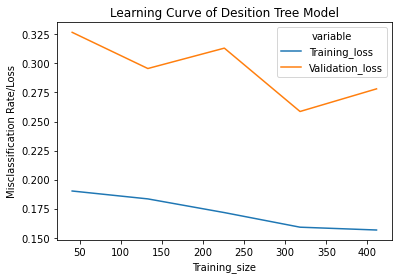

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

lc = learn_curve(x_train,y_train,10)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')

sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of Desition Tree Model")
plt.ylabel("Misclassification Rate/Loss");